In [1]:
import os
import gzip
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import operator

In [25]:
def map_to_prob(asci):  # перевод из ascii в вероятности
    q = ord(asci) - 64
    return q

In [5]:
def count_k_mers(seq, stat_k_mers):
    '''
    stat_k_mers - частота k-меров для всего fastq
    seq - текущий рид 
    '''
    k = 4  # длина k-мера 
    k_mers = []
    for i in range(k, len(seq)+1):
        k_mers.append(seq[i-k:i])
    k_mers = np.array(k_mers)
    x, y = np.unique(k_mers, return_counts=True)
    cur_k_mers = dict(zip(x, y))  # частота к-меров в текущем риде
    for key in cur_k_mers:
        if key not in stat_k_mers: 
            stat_k_mers[key] = cur_k_mers[key]
        else:
            stat_k_mers[key] += cur_k_mers[key]
    return stat_k_mers

In [6]:
input_ = ['frag.R1.fastq.gz', 'frag.R2.fastq.gz']

In [7]:
path_dir = '../data/'

In [8]:
fi_1 = os.path.join(path_dir, input_[0])

In [10]:
fi_2 = os.path.join(path_dir, input_[1])

In [31]:
def read_data(path_name):
    file = gzip.open(path_name, 'rb') 
    data = file.readlines()
    reads = [data[i].strip().decode("utf-8") for i in range(1, len(data), 4)]
    asc_quality = [data[i].strip().decode("utf-8") for i in range(3, len(data), 4)]
    return reads, asc_quality
    

In [48]:
def plot_quality(asc_quality):
    quality_scores = []
    for item in asc_quality:
        cur_q = np.array(list(map(lambda x: map_to_prob(x), item)))
        quality_scores.append(cur_q)
    quality_per_pos = np.mean(quality_scores, axis = 0)
    plt.plot(quality_per_pos)
    plt.title('Средняя вероятность ошибки на позицию в риде')
    plt.xlabel('Позиция')
    plt.ylabel('вероятность ошибки')
    plt.show;

In [32]:
reads, asc_quality = read_data(fi_1)


In [46]:
reads_2, asc_quality_2 = read_data(fi_2)

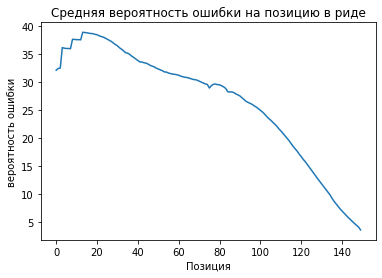

In [29]:
plot_quality(asc_quality)

Похоже на результаты fastqc

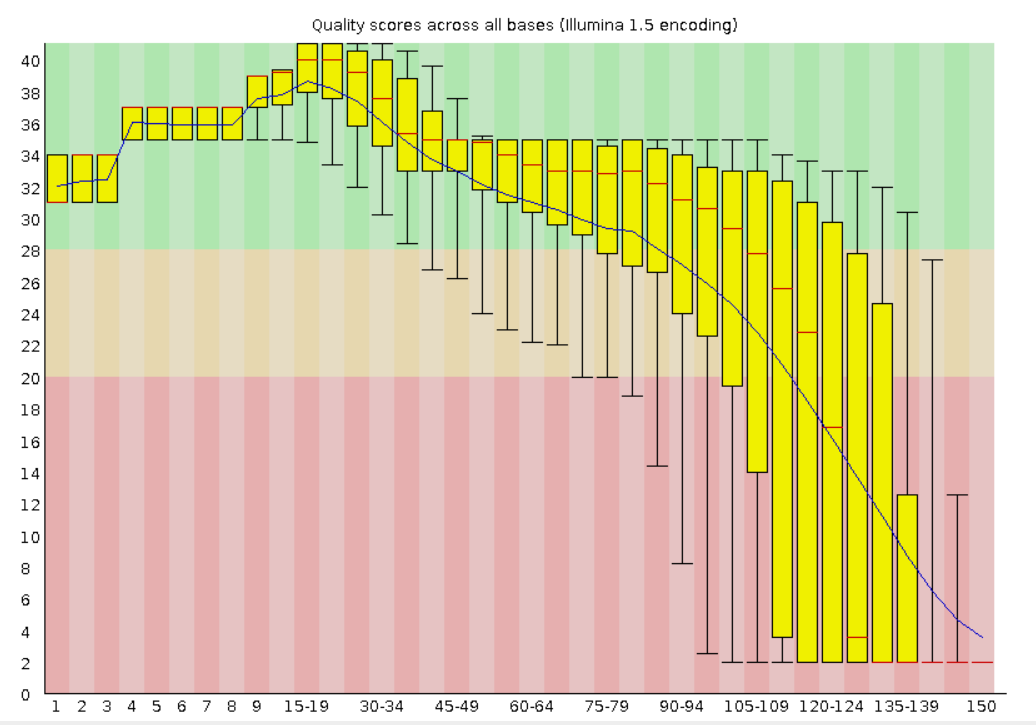

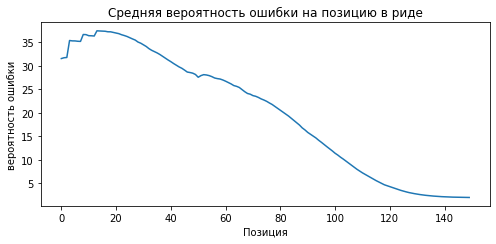

In [49]:
plot_quality(asc_quality_2)

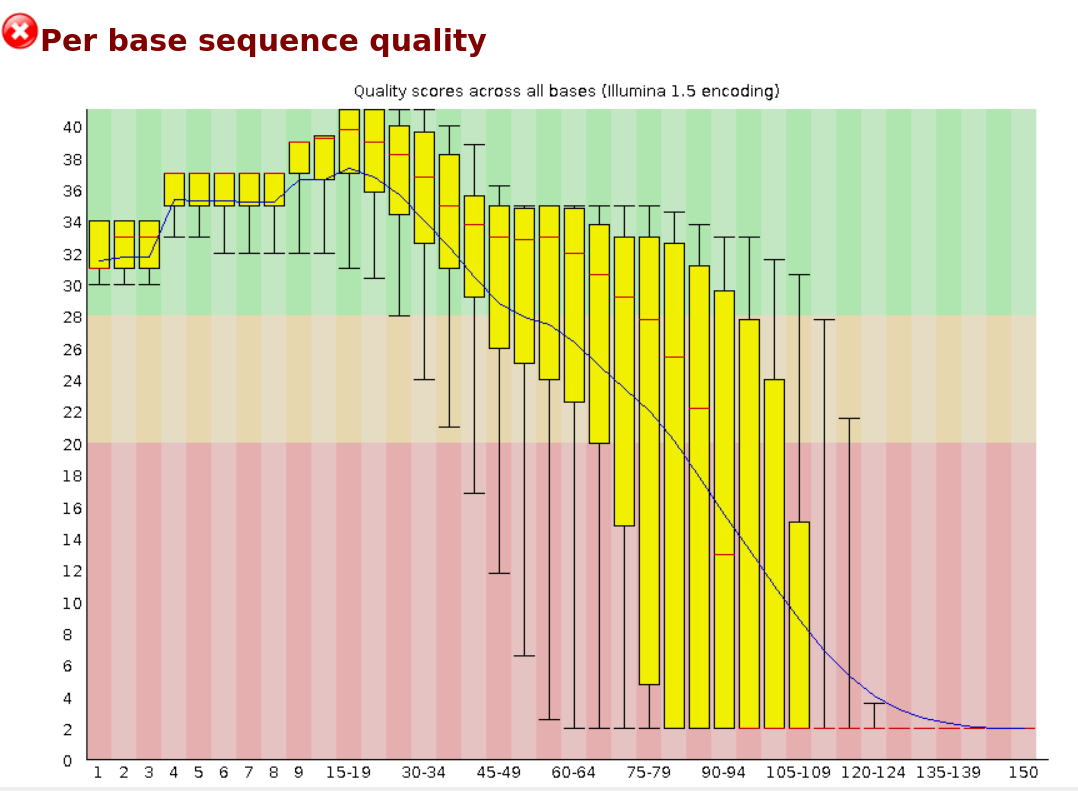

In [39]:
def GC_plot(reads):
    gc_stat = []
    for read in reads:
        gc_fract = sum(map(lambda x: x == 'G' or x == 'C', read))/len(read)
        gc_stat.append(gc_fract)
    x, y = np.unique(gc_stat, return_counts=True)
    plt.rcParams["figure.figsize"] = [7.00, 3.50]
    plt.rcParams["figure.autolayout"] = True
    plt.grid()
    plt.plot(x, y, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="green")
    plt.xlabel("GC-частота")
    plt.ylabel("Кол-во ридов")
    plt.show()
        
    

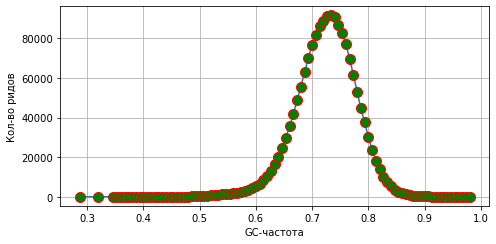

In [40]:
GC_plot(reads)

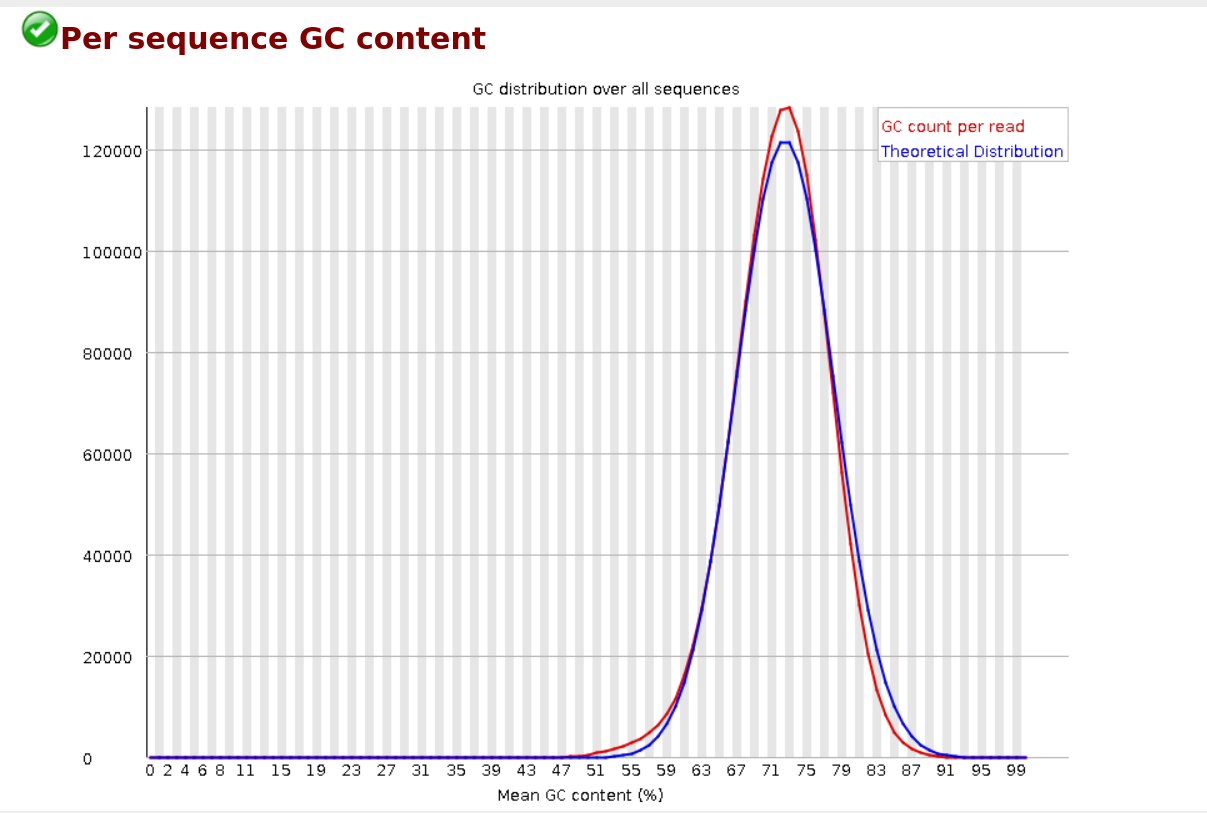

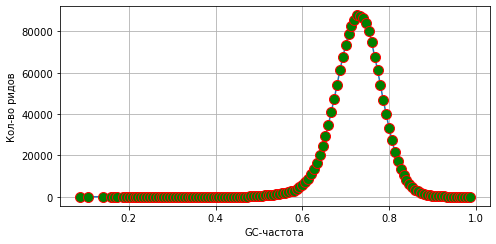

In [50]:
GC_plot(reads_2)

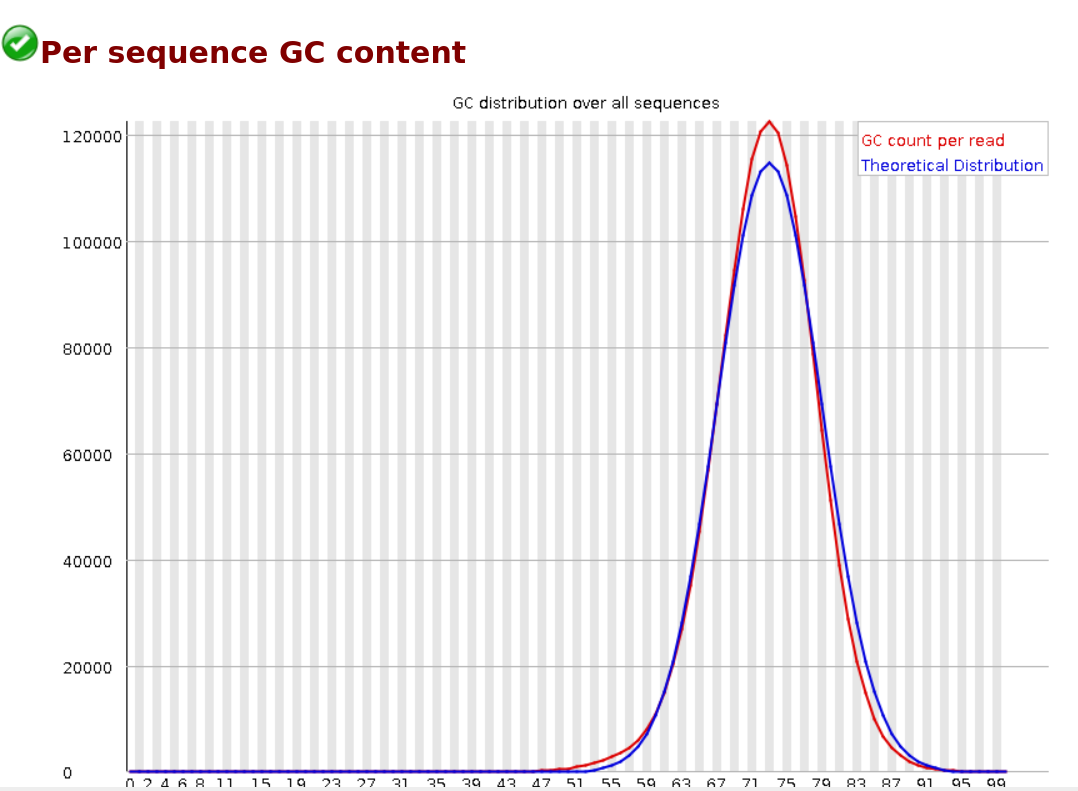

In [52]:
def plot_count_kmers(reads):
    stat_k_mers = {}
    for read in reads:
        stat_k_mers = count_k_mers(read, stat_k_mers)
    stat_k_mers = sorted(stat_k_mers.items(), key=operator.itemgetter(1), reverse=True)
    d = list(map(lambda x: x[1], stat_k_mers))
    fig, ax = plt.subplots(figsize=(12, 6))
    plt.bar(np.arange(len(d)), d, edgecolor = 'r')
    plt.xlim([0,250])
    plt.xlabel("K-мер")
    plt.ylabel("Частота")
    plt.show()
    top_max = ' '.join(list(map(lambda x: x[0], stat_k_mers[:10])))                                              
    print(f'top 10 max kmers {top_max}')
    top_min = ' '.join(list(map(lambda x: x[0], stat_k_mers[-10:])))
    print(f'top 10 min kmers {top_min}')

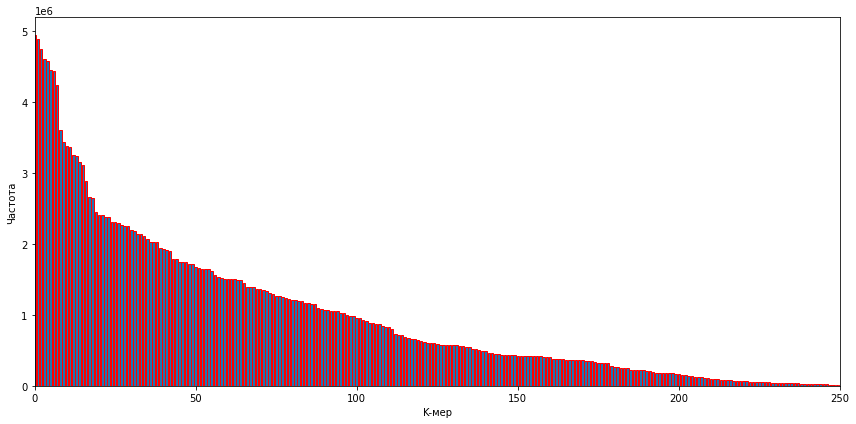

top 10 max kmers GCCG CGCC CGGC GGCG CCGC GCGC CGCG GCGG CCGG CCCG
top 10 min kmers TCNN TAAN CNTA ANNN NNGG NNNG ANTC ANTA ANTG NANT


In [45]:
plot_count_kmers(reads)

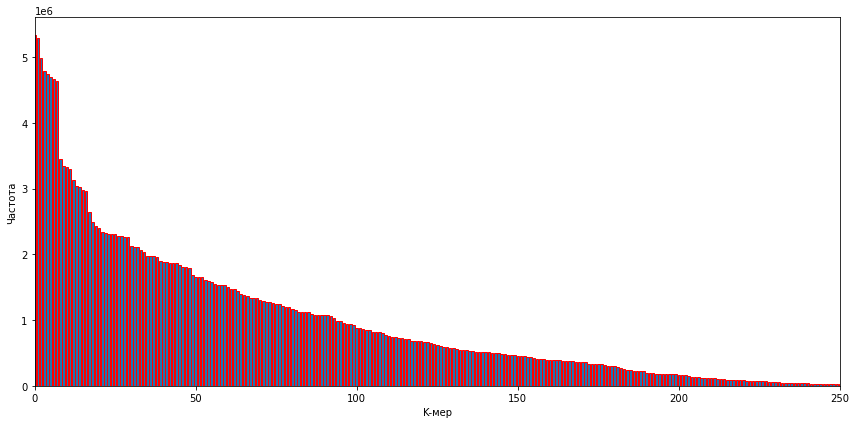

top 10 max kmers CGCG GCGC GGCG CGCC CGGC CCGC GCCG GCGG CGGG GGGC
top 10 min kmers NTTT NTAT ATAN ANTT TANA TAAN ANTN TTAN NTAA NTTA


In [53]:
plot_count_kmers(reads_2)

Обнадеживает что анонимные нуклеотиды встречаются в низкочастотных k-мерах, и не встречаются в высокочастотных. 

И в высокочатотных ридах большинство G и С, что подвержадется высокой долей GC 